In [1]:
"""
Analyze Abl:Gefinitinib singlet (single fluorescent inhibitor) assay.

"""

from autoprotocol.unit import Unit
from assaytools.experiments import SingletAssay

#
# Competition assay
#

params = {
    'd300_xml_filename' : 'Src_Bos_Ima_96well_Mar2015 2015-03-07 1736.DATA.xml', # HP D300 dispense simulated DATA file
    'infinite_xml_filename' : 'Abl Gef gain 120 bw1020 2016-01-19 15-59-53_plate_1.xml', # Tecan Infinite plate reader output data
    'dmso_stocks_csv_filename' : 'DMSOstocks-Sheet1.csv', # CSV file of DMSO stock inventory
    'hpd300_fluids' : ['GEF001', 'IMA001', 'DMSO'], # uuid of DMSO stocks from dmso_stocks_csv_filename (or 'DMSO' for pure DMSO) used to define HP D300 XML <Fluids> block
    'hpd300_plate_index' : 1, # plate index for HP D300 dispense script
    'receptor_species' : 'Abl(D382N)', # receptor name (just used for convenience)
    'protein_absorbance' : 4.24, # absorbance reading of concentrated protein stock before dilution
    'protein_extinction_coefficient' : Unit(49850, '1/(moles/liter)/centimeter'), # 1/M/cm extinction coefficient for protein
    'protein_molecular_weight' : Unit(41293.2, 'daltons'), # g/mol protein molecular weight
    'protein_stock_volume' : Unit(165.8, 'microliters'), # uL protein stock solution used to make 1 uM protein stock
    'buffer_volume' : Unit(14.0, 'milliliters'), # mL buffer used to make 1 uM protein stock
    'rows_to_analyze' : ['A', 'B'], # rows to analyze
    'assay_volume' : Unit(100.0, 'microliters'), # quantity of protein or buffer dispensed into plate
    'measurements_to_analyze' : ['fluorescence top'], # which measurements to analyze (if specified -- this is optional)
    'wavelengths_to_analyze' : ['280:nanometers', '480:nanometers'], # which wavelengths to analyze (if specified -- this is optional)
}

# Create a single-point (singlet) assay.
assay = SingletAssay(**params)

# Load data
import cPickle as pickle
trace = pickle.load(open('output.pickle', 'r'))

There are 24 wells to analyze in the provided WellGroup
Solutions in use: set(['buffer', 'protein', 'DMSO', 'GEF001'])
all wavelengths in use:
set(['480:nanometers', '280:nanometers'])
well volumes:
  log volume of well assay-plate A1
  log volume of well assay-plate A2
  log volume of well assay-plate A3
  log volume of well assay-plate A4
  log volume of well assay-plate A5
  log volume of well assay-plate A6
  log volume of well assay-plate A7
  log volume of well assay-plate A8
  log volume of well assay-plate A9
  log volume of well assay-plate A10
  log volume of well assay-plate A11
  log volume of well assay-plate A12
  log volume of well assay-plate B1
  log volume of well assay-plate B2
  log volume of well assay-plate B3
  log volume of well assay-plate B4
  log volume of well assay-plate B5
  log volume of well assay-plate B6
  log volume of well assay-plate B7
  log volume of well assay-plate B8
  log volume of well assay-plate B9
  log volume of well assay-plate B10
  log

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [3]:
well_name = 'A1'
(excitation_wavelength, emission_wavelength, geometry) = ['280:nanometers', '480:nanometers', 'top']
print trace['computed %(geometry)s fluorescence of well assay-plate %(well_name)s at excitation wavelength %(excitation_wavelength)s and emission wavelength %(emission_wavelength)s' % locals()][0]
well = assay.plate.well(well_name)
print well.properties['measurements']['fluorescence'][(excitation_wavelength, emission_wavelength, geometry)]

[ 66983.84139569  69104.44244105  67452.33026769  66325.37724859
  64814.88422218  67543.73137365  64588.16595948  66012.22896319
  62063.73038746  64499.98156795  67634.35668251  68590.46154526
  67025.65806413  67997.10497177  68783.91491722  67846.30853714
  65510.89778712  68269.43052019  65903.75548931  65113.46009143
  65204.52539626  67464.76817798  64659.32225111  66948.9409729
  65183.11974224  68339.3103528   65741.53830322  65468.39808963
  66054.90792076  66785.37302304  67583.25254229  67208.01415285
  67292.48344057  66087.20743024  64866.86955252  68143.32503773
  63450.47543888  63188.29060149  65110.74848396  69014.21413357
  66897.36778888  64489.25397425  66930.71473274  66249.45208623
  67077.40348506  69841.87473209  65959.99464357  66535.57324759
  68881.39085022  66036.55381892  65516.42824357  68133.44474307
  69760.10901673  65808.75037429  66520.71632013  65453.43059514
  64931.71642919  68170.07241953  66473.04941484  66031.95085778
  66232.5685822   69337.32

well volumes
fluorescence
DeltaGs
dispensed volumes
extinction coefficients
solution concentrations
well concentrations


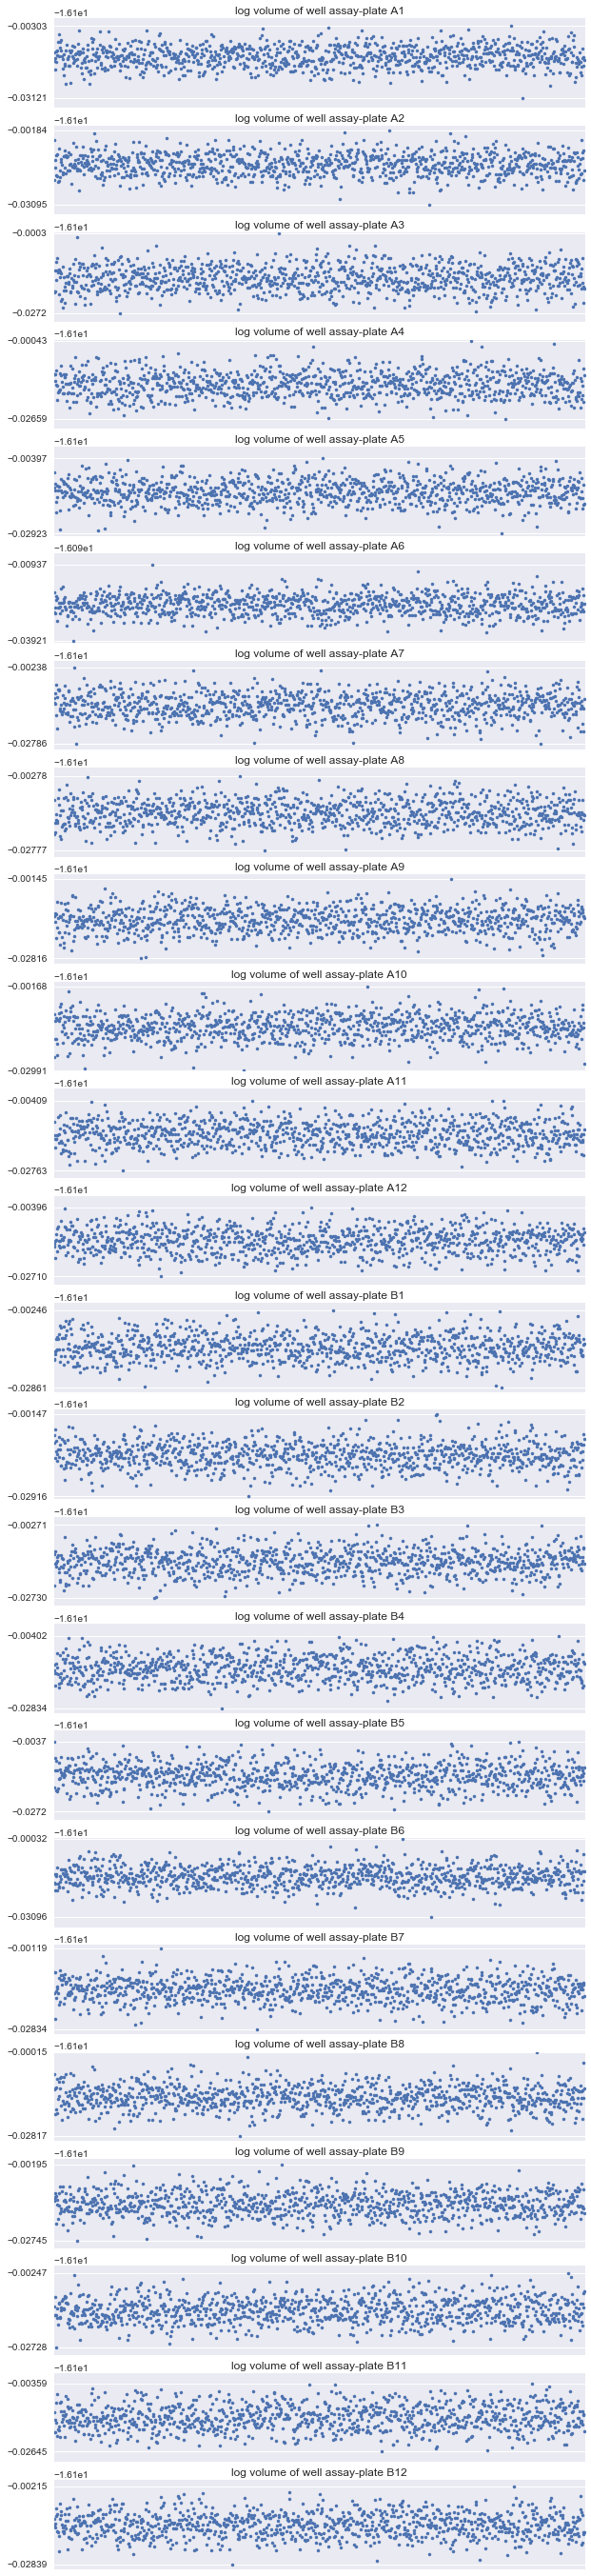

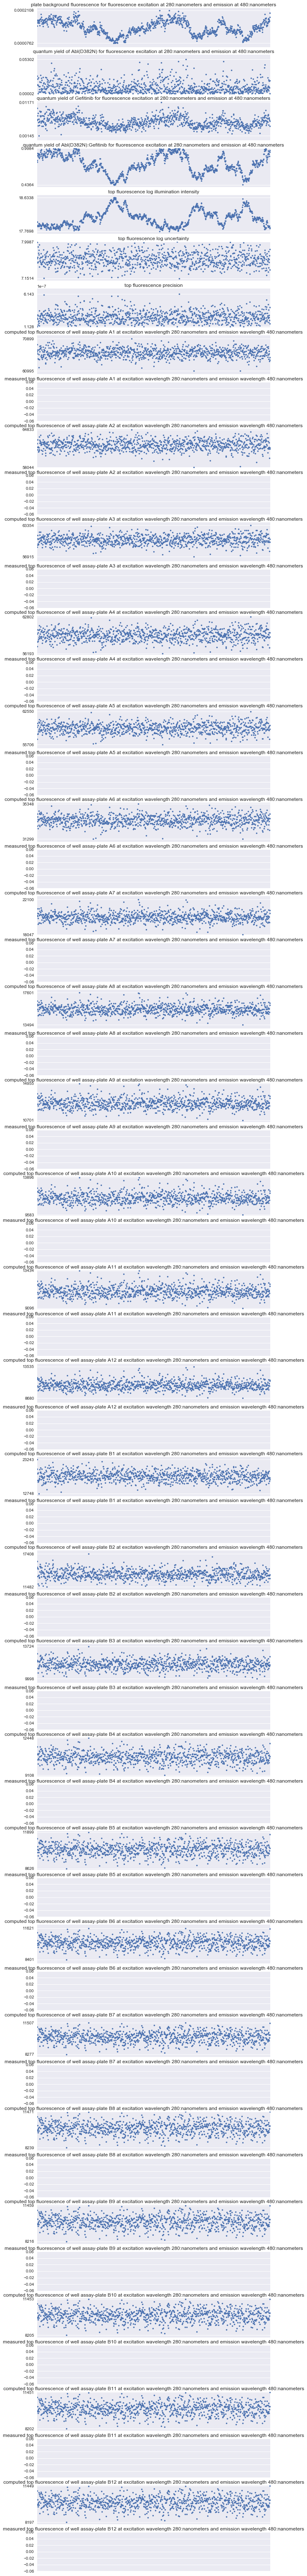

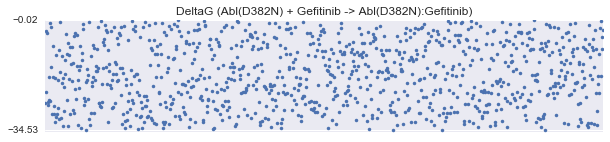

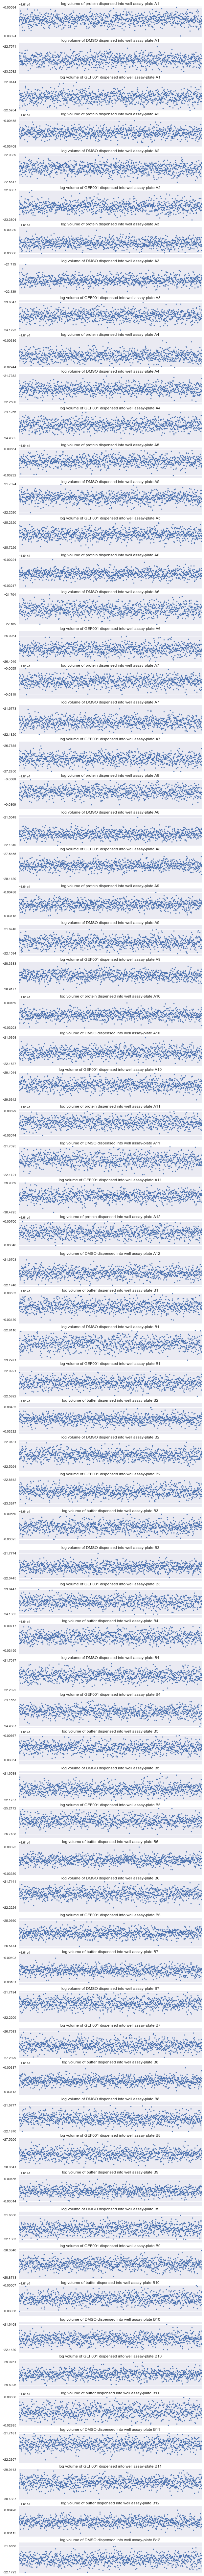

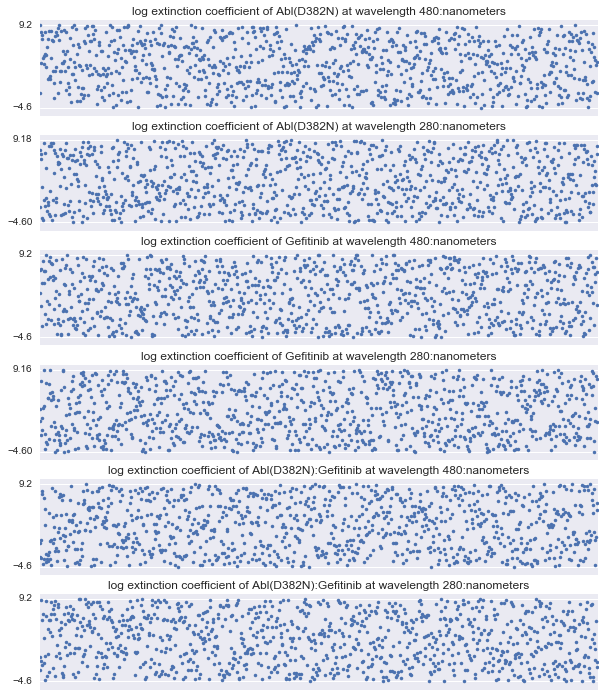

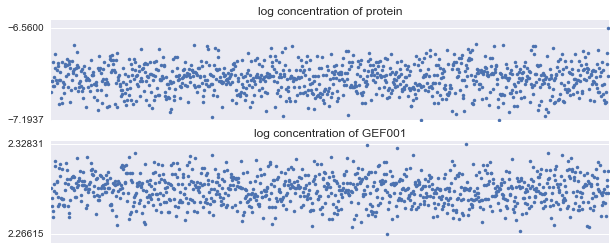

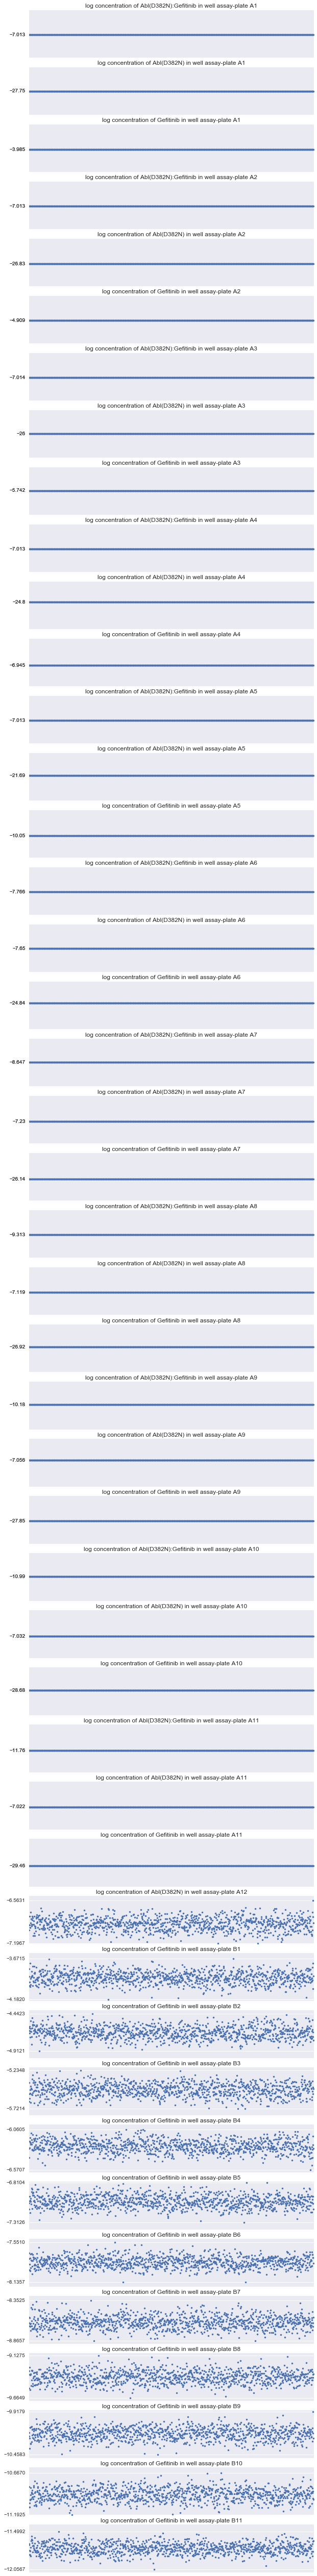

In [4]:
chain = 0
for group in assay.experiment.parameter_names.keys():
    print(group)
    parameters = assay.experiment.parameter_names[group]
    nparameters = len(parameters)
    plt.figure(figsize=[10,2*nparameters]);
    for (index,parameter) in enumerate(parameters):
        plt.subplot(nparameters,1,index+1);
        if parameter in trace:
            samples = trace[parameter][chain]
            plt.plot(samples, '.');
            plt.yticks([samples.min(), samples.max()]);
        else:
            plt.plot([], [], '.');
        plt.xticks([]);
        plt.title(parameter);


1000


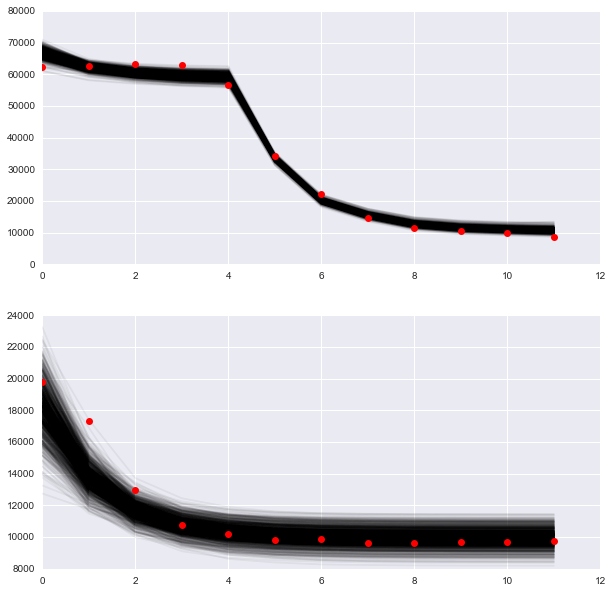

In [5]:
plt.figure(figsize=[10,10]);
ncols = 12
nsamples = len(trace['log concentration of protein'][0])
print(nsamples)
model = np.zeros([ncols,nsamples])
measured = np.zeros([ncols])
for (row_index, row) in enumerate(['A', 'B']):
    plt.subplot(2,1,row_index+1);
    plt.hold(True)
    for column_index in range(ncols):
        column = str(column_index+1)
        well_name = row + column
        (excitation_wavelength, emission_wavelength, geometry) = ['280:nanometers', '480:nanometers', 'top']
        well = assay.plate.well(well_name)
        measured[column_index] = well.properties['measurements']['fluorescence'][(excitation_wavelength, emission_wavelength, geometry)]        
        model[column_index,:] = trace['computed %(geometry)s fluorescence of well assay-plate %(well_name)s at excitation wavelength %(excitation_wavelength)s and emission wavelength %(emission_wavelength)s' % locals()][0][:]
    for sample in range(nsamples):
        plt.plot(range(ncols), model[:,sample], 'k-', alpha=0.05);
    plt.plot(range(ncols), measured, 'ro');

        
        